## Run a custom kernel code

In this notebook we want to have a quick look at the pyclesperanto custom kernel call. This function is particularly usefull for developing and testing OpenCL custom made or not yet available in the pyclesperanto kernel list.

In [1]:
from skimage.io import imread, imshow
import numpy as np
import pyclesperanto as cle

In [2]:
cle.select_device('TX')

<cle::Processor (NVIDIA GeForce GTX 1050 Ti)>

### Load image to process

lets first setup an image to apply a operation on

In [3]:
image = imread("https://imagej.nih.gov/ij/images/blobs.gif")
print(type(image), image.shape, image.dtype)

<class 'numpy.ndarray'> (254, 256) uint8


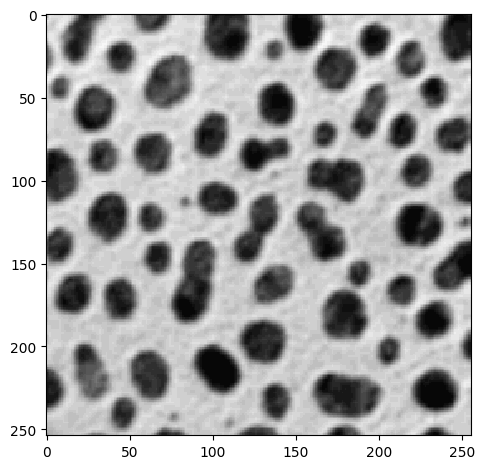

In [4]:
imshow(image)

### Prepare the GPU for processing the image

In [5]:
gpu_input = cle.push(image)
gpu_output = cle.create_like(gpu_input)
print("gpu_input:",type(gpu_input), gpu_input.shape, gpu_input.dtype)
print("gpu_output:",type(gpu_output), gpu_output.shape, gpu_output.dtype)

gpu_input: <class 'pyclesperanto._image.cleImage'> (254, 256) uint8
gpu_output: <class 'pyclesperanto._image.cleImage'> (254, 256) uint8


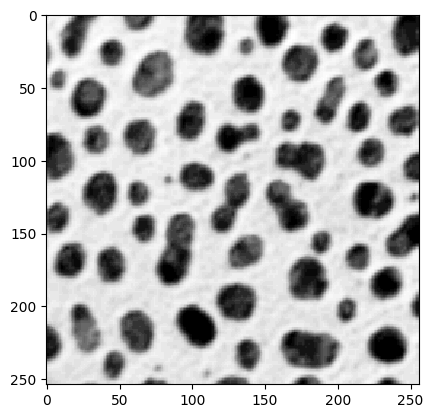

In [6]:
cle.imshow(gpu_input)

### Use the `execute` function to run a kernel

In [7]:
params = {'src': gpu_input, 'dst': gpu_output, 'scalar': 15.0}

In [8]:
cle.execute(anchor=".", 
            opencl_filename="add_image_and_scalar.cl", 
            kernel_name="add_image_and_scalar", 
            parameters=params
           )

Done!
dst : Buffer[256,254,1](dtype=uchar)
scalar : 15
src : Buffer[256,254,1](dtype=uchar)
kernel = ./add_image_and_scalar.cl -> add_image_and_scalar
device = NVIDIA GeForce GTX 1050 Ti
global ranges: 0,0,0


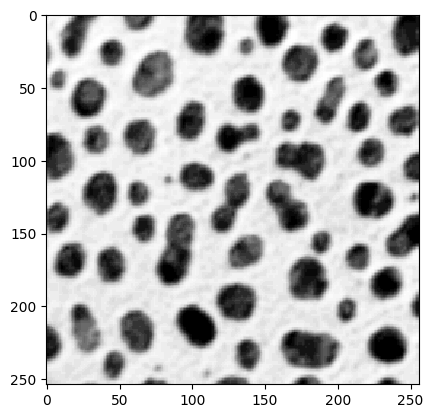

In [19]:
cle.imshow(params['dst'])

In [20]:
print("output:", params['dst'])
print("image:", image)

output: [[230 238 246 ...  54  70  70]
 [214 230 246 ...  38  54  54]
 [206 222 246 ...  30  38  38]
 ...
 [198 190 190 ... 222 222 222]
 [190 190 190 ... 222 222 222]
 [174 182 190 ... 222 222 222]]
image: [[215 223 231 ...  39  55  55]
 [199 215 231 ...  23  39  39]
 [191 207 231 ...  15  23  23]
 ...
 [183 175 175 ... 207 207 207]
 [175 175 175 ... 207 207 207]
 [159 167 175 ... 207 207 207]]


In [18]:
print(cle.pull(params['dst'])[1,1] - image[1,1])

15
